In [56]:
# Imports
%matplotlib inline
import quandl
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from datetime import datetime, timedelta
from collections import defaultdict
import matplotlib.pyplot as plt

In [166]:
PERIODS = 12
DAYS_BETWEEN = 30

In [146]:
# Get price data from Quandl
bitcoin = quandl.get("BCHAIN/MKPRU")
bitcoin = bitcoin.loc['2011-01-01':] # Remove the 0's
bitcoin.dropna(inplace=True)
bitcoin.columns = ['Last']

In [12]:
def buy_all_now_return(d):
    '''d is the date that you are buying'''
    price_today = bitcoin.loc[d,'Last']
    ret = bitcoin['Last'].iloc[-1] / price_today - 1
    return ret

In [174]:
buy_all_now_return('2018-01-01')

-0.6457257588675362

In [177]:
def dollar_cost_average_return(d, periods=PERIODS, freq= str(DAYS_BETWEEN) + 'D'):
    '''spread your purchase over the next period months from date d'''
    buy_dates = pd.date_range(start=d, periods=periods, freq=freq)
    return np.mean([buy_all_now_return(d) for d in buy_dates])

In [178]:
dollar_cost_average_return('2018-01-01')

-0.3125103673158862

In [168]:
a = []
end_date = (datetime.now() - timedelta(days=PERIODS * DAYS_BETWEEN)).strftime('%Y-%m-%d') 
data = bitcoin.loc[:end_date].copy()

for d, row in data.iterrows():
    bn = buy_all_now_return(d)
    dca = dollar_cost_average_return(d)
    a.append(dca>bn)

data['dca_better'] = a

In [182]:
data.head()

,Last,dca_better,green,red
Date,,,,
2011-01-01,0.299998,False,NaN,0.299998
2011-01-02,0.299996,False,NaN,0.299996
2011-01-03,0.299998,False,NaN,0.299998
2011-01-04,0.299899,False,NaN,0.299899
2011-01-05,0.298998,False,NaN,0.298998


In [194]:
days_dca_better = float(data['dca_better'].value_counts()[1]) / len(data) * 100
print "Dollar cost averaging is better %0.2f%% of the time" % days_dca_better

Dollar cost averaging is better 27.11% of the time


In [169]:
data['red'] = np.where(data['dca_better'] == False, data['Last'], np.NAN)

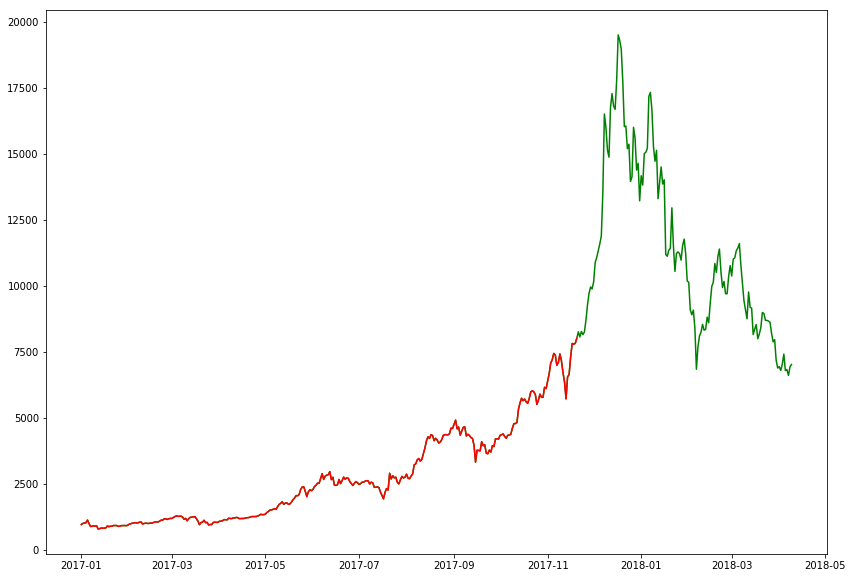

In [211]:
plt.figure(figsize=(14,10))
subset = data.loc['2017':'2019']

plt.plot(subset['Last'], color='green')
plt.plot(subset['red'], color='red');

In [215]:
from bokeh.plotting import figure, output_file, show

output_file("dollar_cost_averaging.html")

p = figure(plot_width=1000, plot_height=600, x_axis_type="datetime")

p.line(d['Last'].index, d['Last'], color="green", alpha=0.5, line_width=2)
p.line(d['red'].index, d['red'], color="red", alpha=0.5, line_width=2)

show(p)